# Finding rich americans

## Participants
Louis Hefter  
Samuel Sonnenwald  
Lucette Kohl  
Philipp Strauss  

## Our Business Case
The present program code reflects our self-chosen scenario, aiming to enhance the effectiveness of marketing for a luxury real estate firm. We deliberately chose this scenario to illustrate all aspects, from selecting metrics to making decisions during the modeling process. The focus is on targeting customers with an income above $50,000.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import itertools
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_score, roc_auc_score
from sklearn.metrics import precision_recall_curve, auc
import plotly.graph_objects as go
import plotly.express as px
from sklearn.metrics import precision_recall_curve, auc
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

# 1. Data Nature
## 1.1. Take a first look at the data


In [2]:
# Provide column names as they are not specified in the file
column_names = [
    'age', 'workclass', 'fnlwgt', 'education', 'education_num',
    'marital_status', 'occupation', 'relationship', 'race', 'sex',
    'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'label'
]

# Read the file with specified column names and specify that the age-information is not(!) the index
df = pd.read_csv("adult.data", header=None, names=column_names, index_col = False)

# Take a first look at the data
display(df.head(15))
print(df.shape)
display(df.info())

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,label
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


(32561, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  label           32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


None

## 1.2. Missing values
- Detection of missing values  
- Replace the missing values with the most common value  

In [3]:
# The summary doesn't show missing values (all Non-Null Counts are equal to the number of rows given in .shape. 
# But from .head() we can see there are entries featuring '?'. Let's encode them with NaN for further analysis.
df.replace(['?', ' ?', '? ', '  ?  '], np.nan, inplace=True)

# See if there are missing values now. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  31978 non-null  object
 14  label           32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
# now we see that in the columns 'workclass', 'occupation', 'native-country' there are missing values. 
# as we don't want to throw away approx. 2000 data points, we can replace the missing values with the most common value (mode) as all three are categorical data
for col in ['workclass', 'occupation', 'native_country']:
    df[col].fillna(df[col].mode()[0], inplace=True)

# lets check again for missing values
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
label             0
dtype: int64

## 1.3. Visualization of the features & Analysis

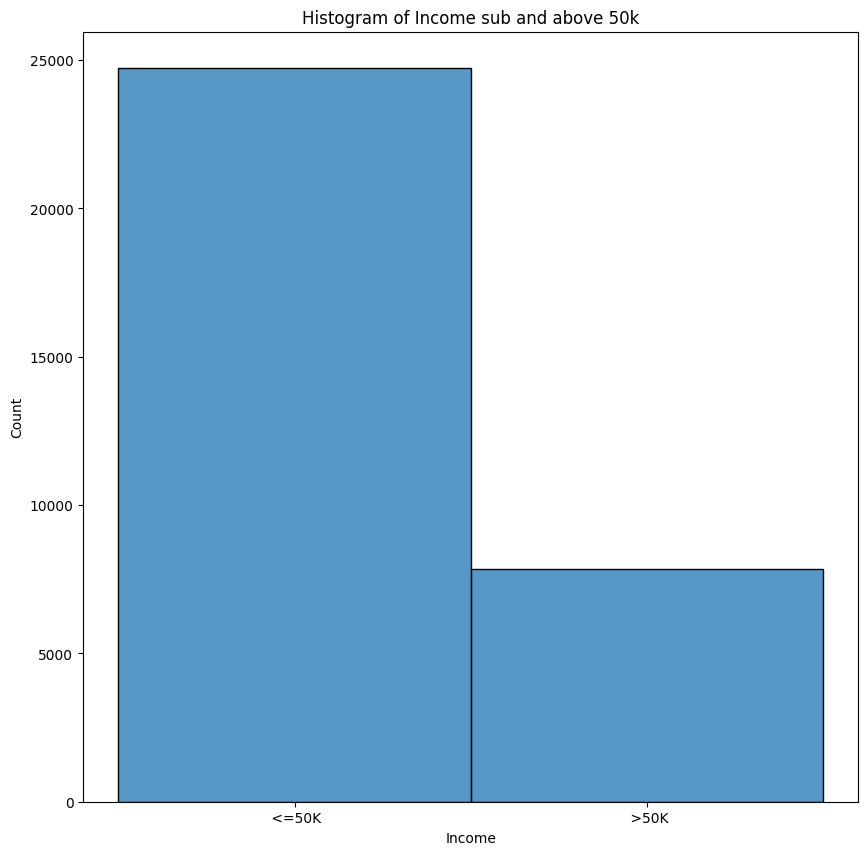

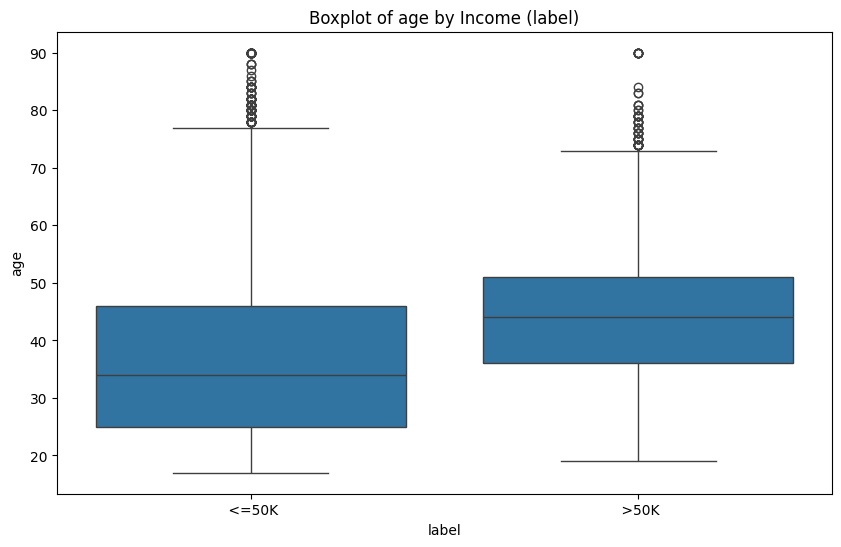

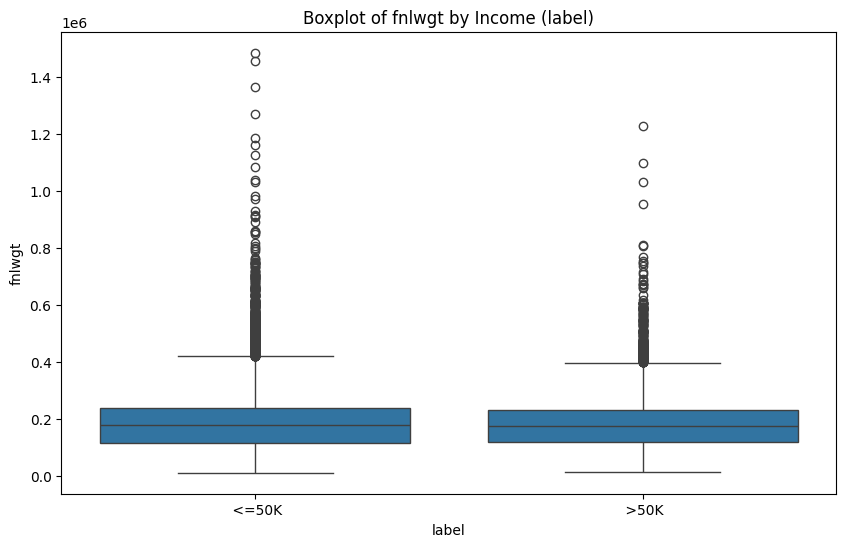

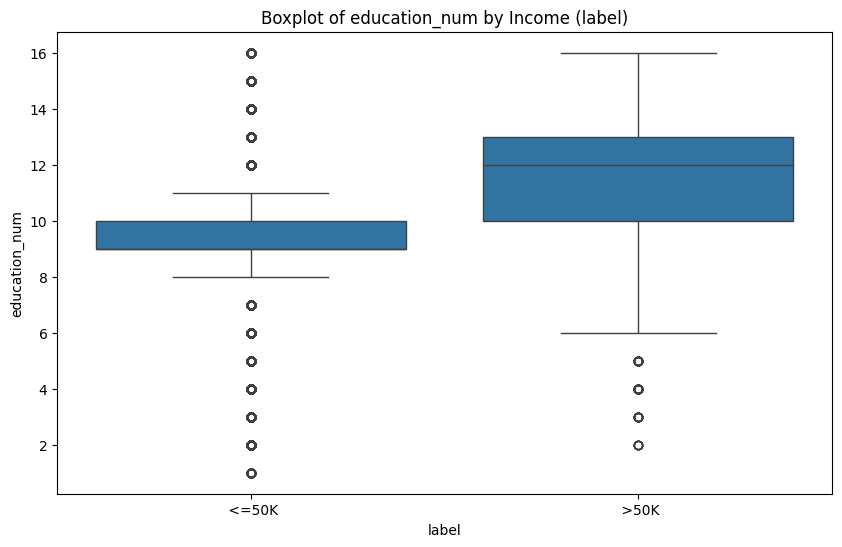

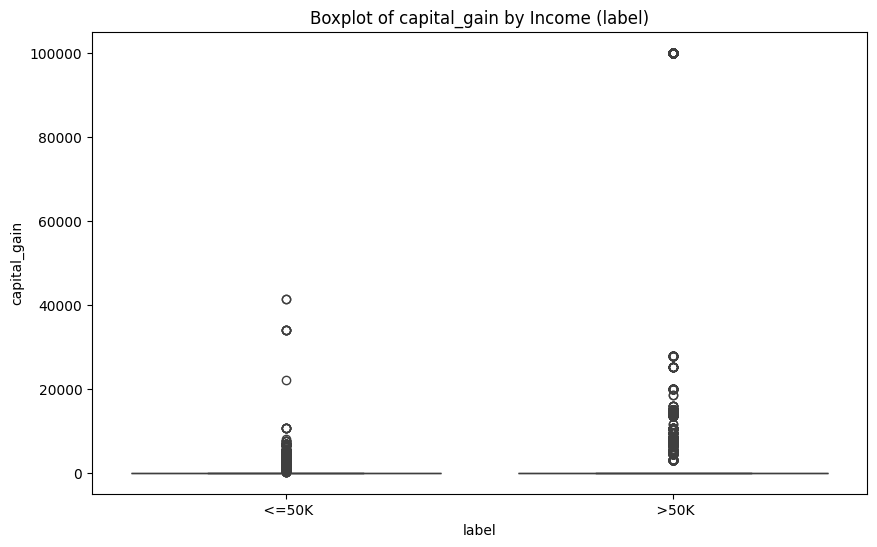

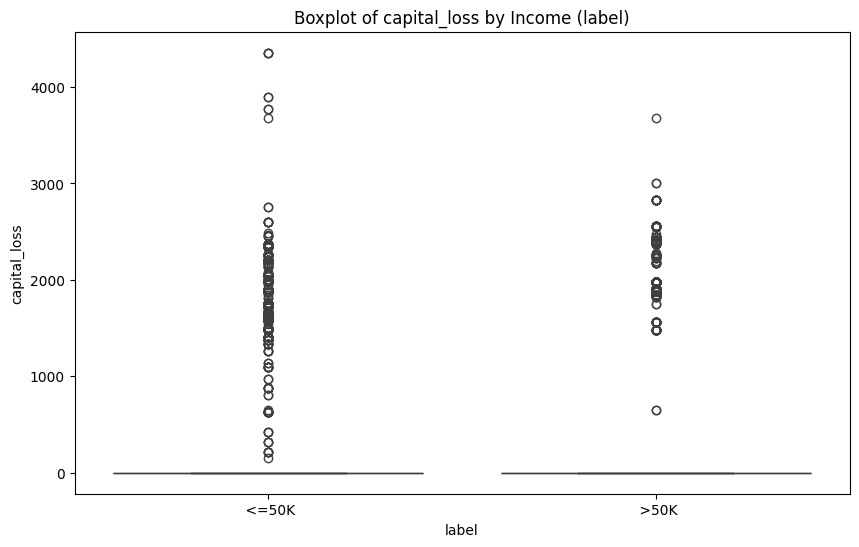

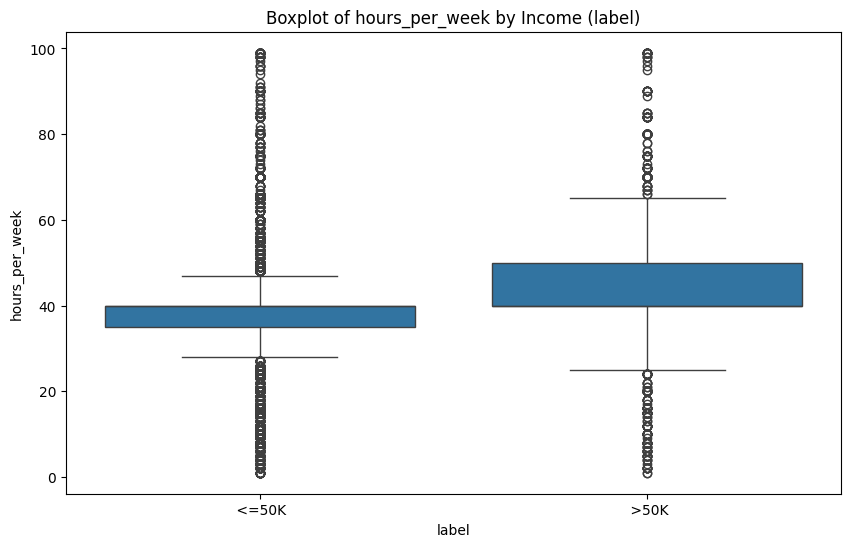

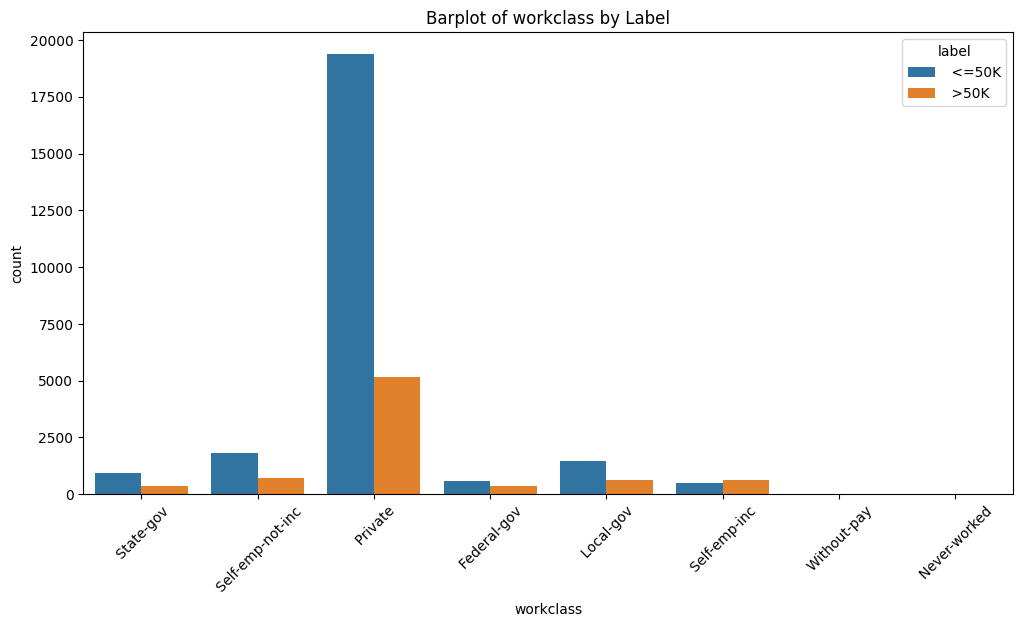

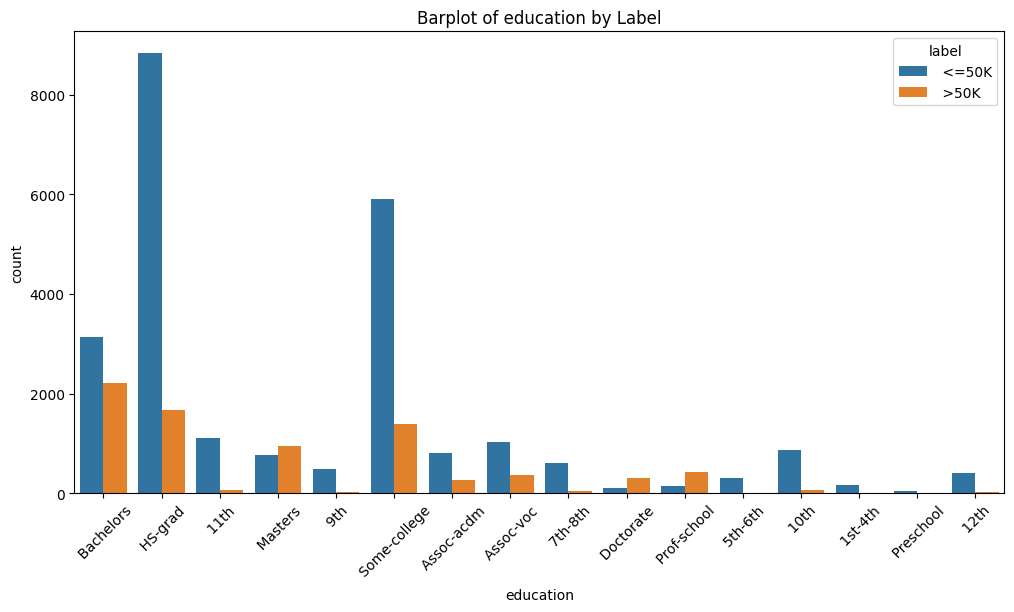

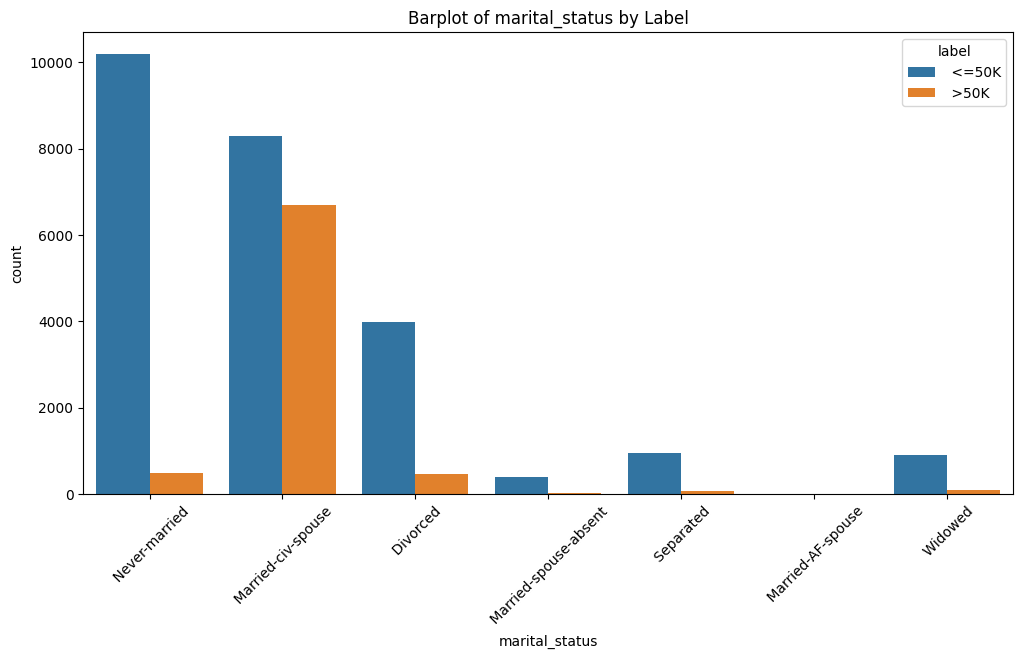

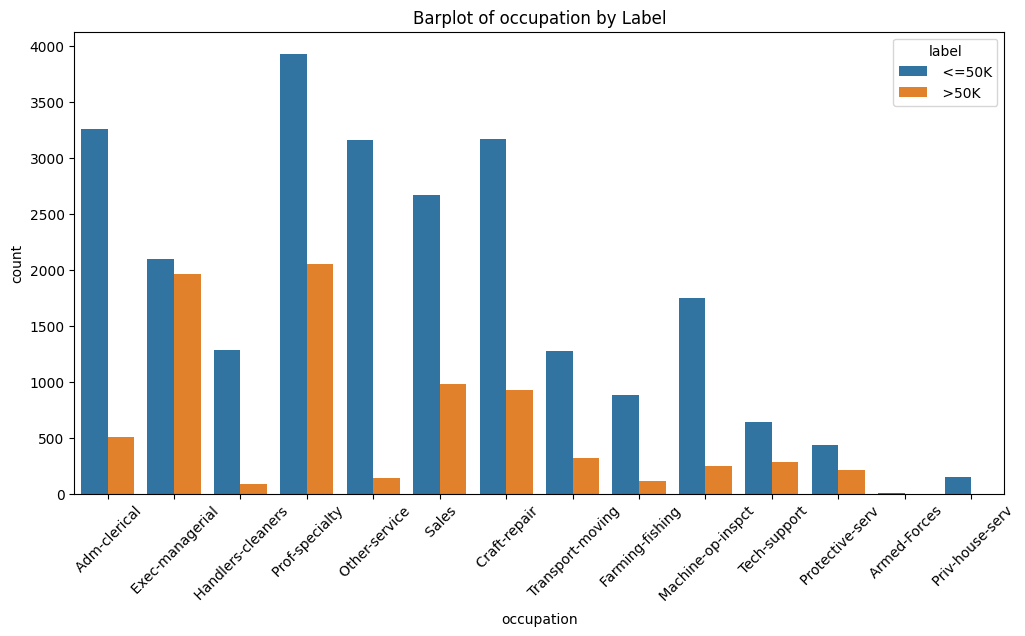

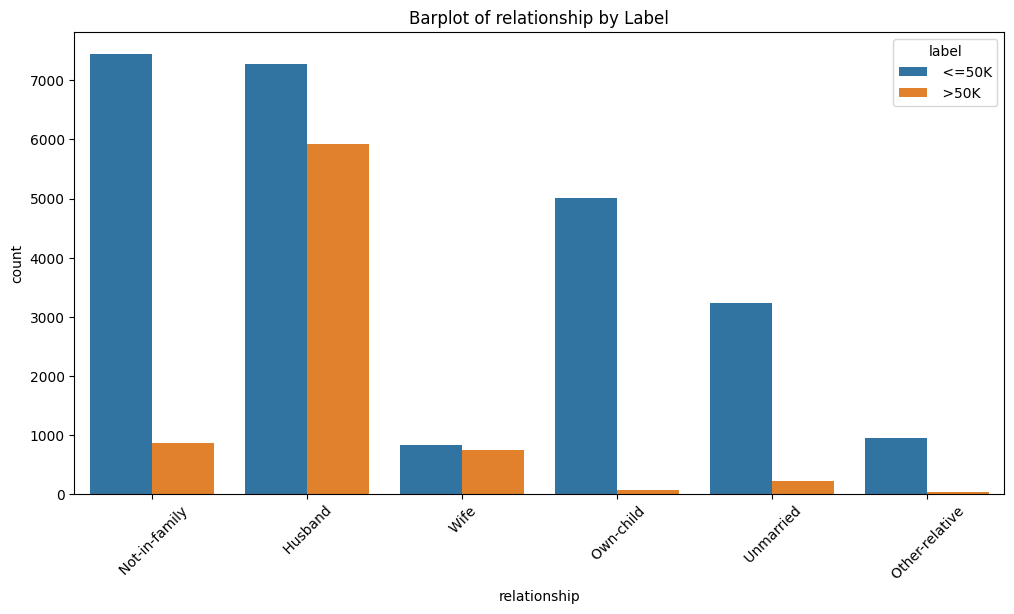

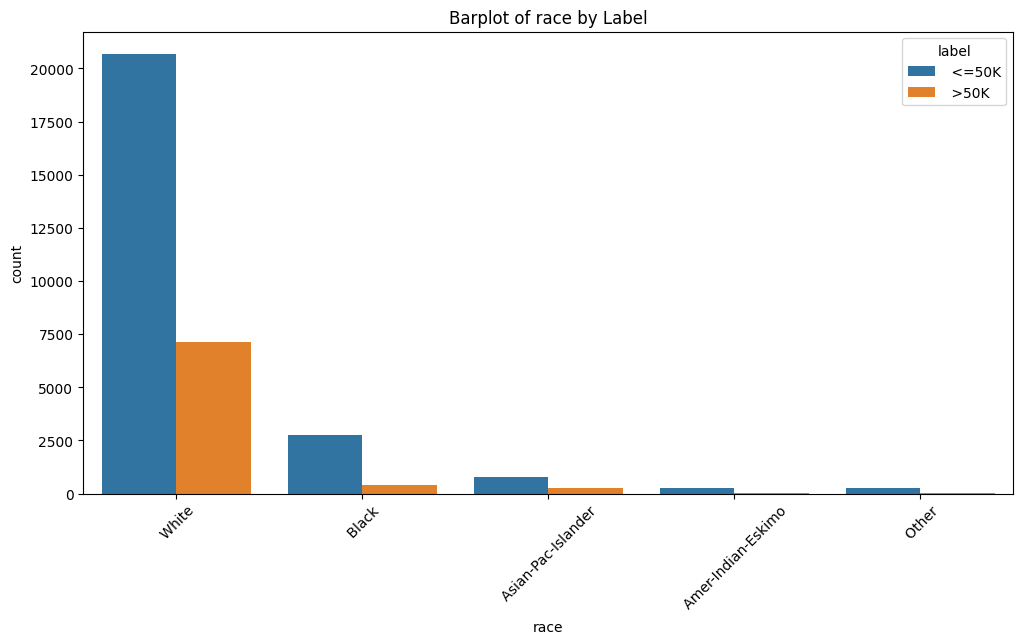

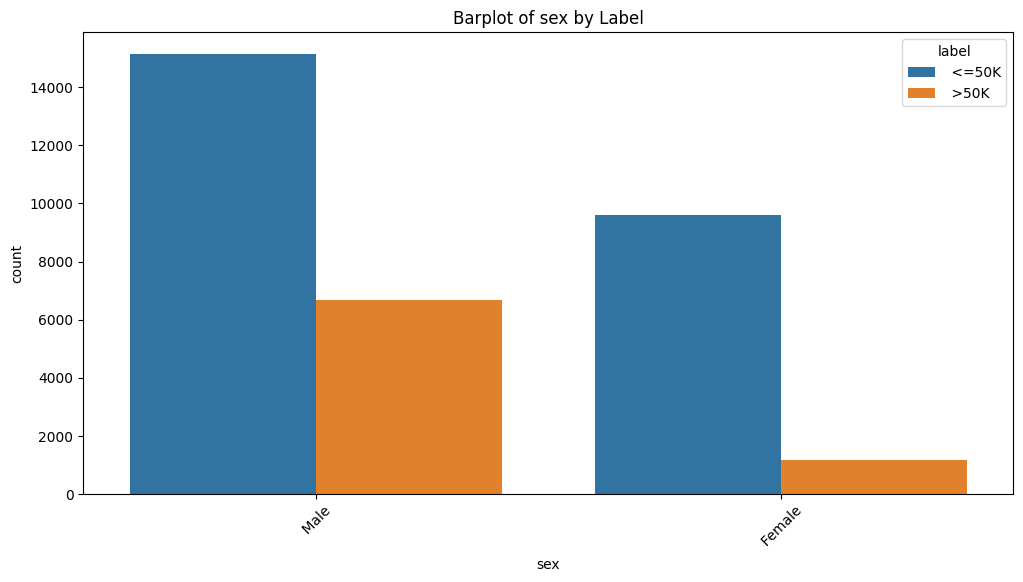

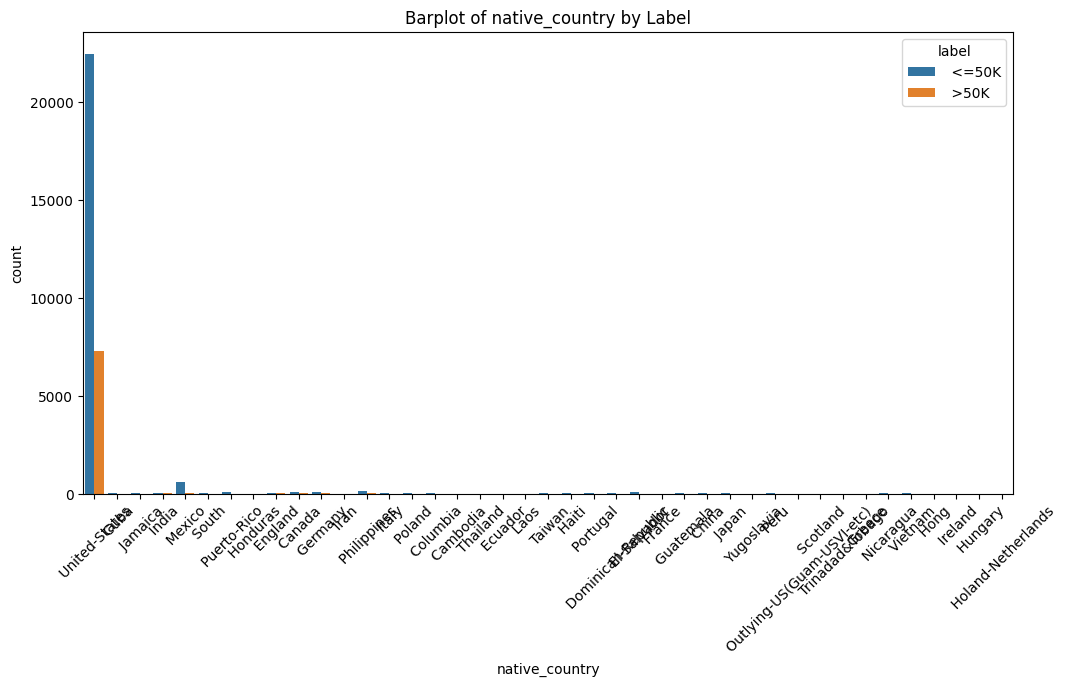

In [5]:
# after dealing with the problem of missing data, lets take again a look on the data. 
# we want to get a first glimpse on the relationsship of the features and the target value, as well as the distribution of the label

# show distribution of the label
plt.figure(figsize = (10,10))
sns.histplot(df['label'])
plt.title('Histogram of Income sub and above 50k')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()

# Numerical features - Boxplots
numerical_features = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']

for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='label', y=feature, data=df)
    plt.title(f'Boxplot of {feature} by Income (label)')
    plt.show()

# Categorical features - Grouped Barplots
categorical_features = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country'] 

for feature in categorical_features:
    plt.figure(figsize=(12, 6))
    sns.countplot(x=feature, hue='label', data=df)
    plt.title(f'Barplot of {feature} by Label')
    plt.xticks(rotation=45)
    plt.show()

The histogram shows us that we have to deal with imbalanced data. An income of '<=50k' is way more present in the dataset than '>50k'.

In the displayed graphs, we observe patterns that suggest potential correlations between certain features and the label variable. These patterns could serve as valuable information for machine learning algorithms tasked with predicting the label. While not all features exhibit a straightforward or definitive tendency, the discernible correlations provide a foundation for building predictive models. The algorithms can leverage these relationships to make informed predictions about the label, even in cases where the associations are not universally clear or 100% conclusive.

# 2. Preprocessing
- Splitting the data
- Label Encoding
- Define Pipeline & ColumnTransformer

We use a ColumnTransformer to allow for multiple preprocessing steps on the same dataframe.
### OneHotEncoder Usage

- **workclass**: Categorical and Non-binary
- **marital_status**: Categorical and Non-binary
- **occupation**: Categorical and Non-binary
- **relationship**: Categorical and Non-binary
- **race**: Categorical and Non-binary
- **sex**: Categorical and Binary
- **native_country**: Categorical and Non-binary

### MinMaxScaler Usage

- **age**: Numeric
- **fnlwgt**: Numeric
- **capital_gain**: Numeric
- **capital_loss**: Numeric
- **hours_per_week**: Numeric
- **education_num**: Numeric

In [6]:
# split the df in the data and target label
df_target = df['label']
df_data = df.drop(columns = 'label')

# Preprocess the label - Using LabelEncoder
label_encoder = LabelEncoder()
df_target = label_encoder.fit_transform(df_target)
label_names = ['<=50k', ' >50k']
label_order=[0,1]

# classify the data features (data-type)
numeric_features = ['age', 'fnlwgt', 'capital_gain', 'capital_loss', 'hours_per_week', 'education_num']
# we leave out the feature education - reason will follow 
categorical_features = ['workclass', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country']

''' Education would be a features we want to encode ordinally as the differences make a real sense
(bigger difference between Preschool and Masters as between Bachelor and Masters).
But there is a feature called 'education-num' that may already do that. Lets investigate further.'''

# verify if there is only one specific 'education-num'-value for each unique value of education
unique_combinations_count = df.groupby(['education', 'education_num']).size().reset_index(name='Count')
print(unique_combinations_count)

''' As we can see in the table below, there is just one combination for each of the two values.
Also the numeration is in the correct order (least education (1 - Preschool) to most education
(16 - Doctorate). So we don't need to encode it manually and drop the 'education' column due to 
redundant data.'''

df_data = df_data.drop(columns = 'education')

# now we can create our train and test split
data_train, data_test, target_train, target_test = train_test_split(
    df_data, df_target, test_size=0.2, random_state=42, stratify=df_target)

# now we can define our pipeline 

# first define a columnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numeric_features), 
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# now pipeline with ColumnTransformer, Balancer (RandomOverSampler), and estimator - just an example!
pipeline = Pipeline([
    ('preprocessing', preprocessor), 
    ('balancing', RandomOverSampler()), 
    ('estimator', None)
])

# now create Folds for Cross-Validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

        education  education_num  Count
0            10th              6    933
1            11th              7   1175
2            12th              8    433
3         1st-4th              2    168
4         5th-6th              3    333
5         7th-8th              4    646
6             9th              5    514
7      Assoc-acdm             12   1067
8       Assoc-voc             11   1382
9       Bachelors             13   5355
10      Doctorate             16    413
11        HS-grad              9  10501
12        Masters             14   1723
13      Preschool              1     51
14    Prof-school             15    576
15   Some-college             10   7291


# 3. Classification
- Define scorer
- Creation of classifiers
- Test

In our specific business case for the luxury real estate firm, where the primary goal is to identify high-income customers (income above $50,000), we prioritize **recall** over accuracy as a key metric. Recall is particularly relevant in scenarios where the cost of missing positive instances (failing to identify potential customers with high income) is high.
In the real estate business, correctly identifying affluent customers is crucial for targeted marketing efforts. By focusing on recall, we aim to minimize false negatives—cases where the algorithm fails to identify customers with high income. This is more important for our business case than optimizing overall accuracy.

By choosing **Multinomial Naive Bayes**, we aim to make the best compromise between the nature of our data and the algorithm's suitability. While acknowledging that it might not be a perfect fit for all features, the algorithm's ability to effectively analyze the majority of our dataset makes it a practical choice for our specific scenario. This decision allows us to leverage the strengths of Multinomial Naive Bayes in handling discrete features while keeping in mind the nuances of our dataset.

In [13]:
# after preprocessing and prep, get a first impression on the performance of the classifiers

# as scorer we define recall
from sklearn.naive_bayes import GaussianNB


scoring_metric = 'recall'

# we want to test the models from the exercises with their basic parameters

# Create classifiers and save them in a list
knn_classifier = KNeighborsClassifier()
tree_classifier = DecisionTreeClassifier()
rf_classifier = RandomForestClassifier()
ada_classifier = AdaBoostClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)
nb_classifier = MultinomialNB()
classifier_to_test = [knn_classifier, tree_classifier, rf_classifier, ada_classifier, nb_classifier]
names = ['KNN', 'DecisionTree', 'Random Forest', 'ADA-Boost', 'Naive Bayes']


# iterate and test
for name, classifier in zip(names, classifier_to_test): 
    pipeline = Pipeline([
        ('preprocessing', preprocessor),
        ('balancing', RandomOverSampler()),
        ('estimator', classifier)
    ])   
    recall = cross_val_score(pipeline, data_test, target_test, cv=cv, scoring=scoring_metric)

    print(f'{name} Recall: {recall.mean()}')

KNN Recall: 0.7633798791442105
DecisionTree Recall: 0.6166666666666666
Random Forest Recall: 0.6957618814306712
ADA-Boost Recall: 0.6217867058631389
Naive Bayes Recall: 0.8469418585660623


The recall metrics provide insight into the ability of an algorithm to identify all relevant instances of the particular class of interest. In our specific scenario, aiming to enhance the effectiveness of marketing for a luxury real estate firm, we focus on customers with an income above $50,000. Recall indicates the percentage of actually existing positive instances correctly identified by the algorithm. In other words, how well does the algorithm succeed in identifying affluent customers?
K-Nearest Neighbors (KNN) demonstrates a solid recall score of 0.763, suggesting that KNN is proficient at identifying relevant instances of the target class.
The Decision Tree exhibits a slightly lower recall of 0.617, representing the percentage of correctly identified positive instances. Despite the slightly lower recall, the Decision Tree could prove particularly effective in specific scenarios.
Random Forest achieves a balanced recall of 0.696, indicating its ability to effectively identify positive instances. The ensemble nature of the Random Forest contributes to its robust performance.
ADA-Boost shows a recall of 0.622. Although it has a slightly lower recall compared to KNN and Random Forest, ADA-Boost brings unique strengths that allow for a differentiated approach to classification tasks.
Notably, Naive Bayes stands out with an impressive recall of 0.847, indicating its strong ability to identify positive instances. This makes Naive Bayes a noteworthy contender in our marketing context, showcasing its effectiveness in recognizing customers with high incomes. 

# 4. Hyperparameter Tuning
- Definition of parameter grid
- Creation of a list to save estimators
- Randomized Search

In [14]:
# after we got a first impression, lets do a randomized search for the five options (Hyperparameter-Tuning)
classifier_to_test = [knn_classifier, tree_classifier, rf_classifier, ada_classifier, nb_classifier]
names = ['KNN', 'DecisionTree', 'Random Forest', 'ADA-Boost', 'Naive Bayes']
# define parameter grid 

knn_param_grid = {
    'estimator__n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21],  # Number of neighbors to consider
    'estimator__weights': ['uniform', 'distance'],  # Weight function used in prediction
    'estimator__p': [1, 2],  # Power parameter for the Minkowski distance
}

dt_param_grid = {
    'estimator__criterion': ['gini', 'entropy'],  # Function to measure the quality of a split
    'estimator__splitter': ['best', 'random'],  # Strategy for choosing the split at each node
    'estimator__max_depth': [None, 10, 20, 30, 40, 50],  # Maximum depth of the tree
    'estimator__min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'estimator__min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
}

rf_param_grid = {
    'estimator__n_estimators': [50, 100, 200, 300],  # Number of trees in the forest
    'estimator__criterion': ['gini', 'entropy'],  # Function to measure the quality of a split
    'estimator__max_depth': [None, 10, 20, 30, 40, 50],  # Maximum depth of the trees
    'estimator__min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'estimator__min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'estimator__bootstrap': [True, False],  # Whether bootstrap samples are used when building trees
}

ada_param_grid = {
    'estimator__estimator__max_depth': [7, 9, 11],  # Add max_depth to the parameter grid
    'estimator__n_estimators': [160, 220, 240],  # Number of weak learners (trees) to train sequentially
    'estimator__learning_rate': [0.5, 1.0],  # Weight contribution of each weak learner
}

multinomial_param_grid = {
    'estimator__alpha': [0.1, 0.5, 1.0, 2.0],  # Additive smoothing parameter (Laplace smoothing)
}

# make it a list
param_grids = [knn_param_grid, dt_param_grid, rf_param_grid, ada_param_grid, multinomial_param_grid]

# define a list to save the best estimators
estimator_list = []

for name, classifier, params in zip(names, classifier_to_test, param_grids): 

    pipeline = Pipeline([
        ('preprocessing', preprocessor),
        ('balancing', RandomOverSampler()),
        ('estimator', classifier)
    ])

    randomized_search_estimator = RandomizedSearchCV(pipeline, param_distributions=params, scoring=scoring_metric, cv=cv, random_state = 42)
    recall = cross_val_score(randomized_search_estimator, data_test, target_test, cv=cv, scoring=scoring_metric)
    
    estimator_list.append(randomized_search_estimator)

    print(f'{name} Recall after Hyperparameter-Tuning: {recall.mean()}')

KNN Recall after Hyperparameter-Tuning: 0.8067450596113016
DecisionTree Recall after Hyperparameter-Tuning: 0.8392903805324188
Random Forest Recall after Hyperparameter-Tuning: 0.8730769230769232
ADA-Boost Recall after Hyperparameter-Tuning: 0.5943532582067614


c:\Users\phili\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
c:\Users\phili\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
c:\Users\phili\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
c:\Users\phili\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iter

Naive Bayes Recall after Hyperparameter-Tuning: 0.8469418585660623


Hyperparameter-Tuning is a crucial step in the modeling process to optimize the performance of an algorithm. This process involves adjusting hyperparameters to ensure the algorithm is finely tuned for the specific dataset and problem. In our code, after preprocessing and applying a model, hyperparameter tuning is carried out to enhance recall. Post hyperparameter tuning, we observe noteworthy shifts in the values of the five models.

The K-Nearest Neighbors (KNN) model shows a slight improvement through tuning but maintains the lowest recall value among the models. The Decision Tree achieves a noticeable increase in recall after tuning, although it retains a solid yet not outstanding performance. Despite a slight decrease after tuning, the Random Forest continues to exhibit the highest recall value, making it the most powerful model.
ADA-Boost achieves a slightly improved recall after tuning, while Naive Bayes maintains its impressive recall. 

# 5. Evaluation
## 5.1. Report and Confusion matrix of each algorithm

In [15]:
# write a function for analysis
from sklearn.calibration import calibration_curve

# copy function for confusion matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

# real analysis function

def evaluate_classification(y_true, y_pred, label_order = label_order):
    """
    Evaluate classification performance and return metrics.
    
    Parameters:
    - y_true: array-like, true labels
    - y_pred: array-like, predicted labels

    Returns:
    - none, only prints results and plots confusion matrix
    """
    # Calculate AUC
    auc = roc_auc_score(y_true, y_pred)
    
    # Generate classification report
    report = classification_report(y_true, y_pred, output_dict=True, zero_division=1)

    # print metrics
    display(report)
    print(f'AUC: {auc}')
    # calculate confusion matrix and plot it
    cm = confusion_matrix(y_true, y_pred, labels=label_order)
    plot_confusion_matrix(cm, classes=label_names, title='Confusion Matrix')

def evaluation_precision_recall(y_true, y_prob):
    """
    Evaluate classification performance and return Precision-Recall curve.
    
    Parameters:
    - y_true: array-like, true labels
    - y_prob: array-like, predicted probabilities

    Returns:
    - none, only prints results and plots Precision-Recall curve
    """
    # Precision-Recall curve
    precision, recall, _ = precision_recall_curve(y_true, y_prob)
    pr_auc = auc(recall, precision)

    # Create a plot for Precision-Recall curve
    plt.figure(figsize=(8, 8))

    # Plot Precision-Recall curve
    plt.plot(recall, precision, color='blue', label=f'PR Curve (AUC = {pr_auc:.2f})')

    # Set labels and title
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()
    plt.show()

   



Training started for KNN


{'estimator__weights': 'uniform',
 'estimator__p': 2,
 'estimator__n_neighbors': 15}

{'0': {'precision': 0.9300048947626041,
  'recall': 0.7684529828109201,
  'f1-score': 0.8415457867345809,
  'support': 4945.0},
 '1': {'precision': 0.5282241450350227,
  'recall': 0.8176020408163265,
  'f1-score': 0.6418022528160201,
  'support': 1568.0},
 'accuracy': 0.7802855826807923,
 'macro avg': {'precision': 0.7291145198988134,
  'recall': 0.7930275118136233,
  'f1-score': 0.7416740197753005,
  'support': 6513.0},
 'weighted avg': {'precision': 0.8332764722886523,
  'recall': 0.7802855826807923,
  'f1-score': 0.7934576766187658,
  'support': 6513.0}}

AUC: 0.7930275118136232


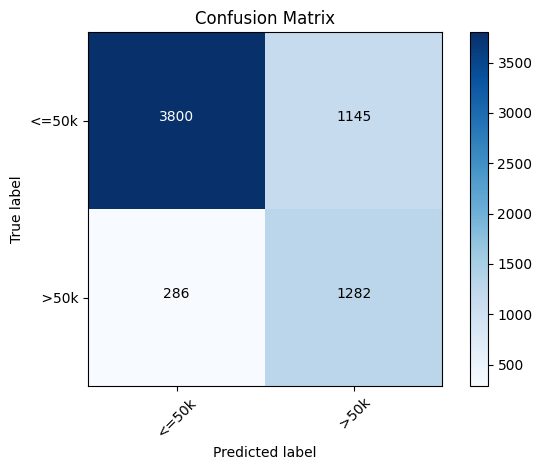


Training started for DecisionTree


{'estimator__splitter': 'best',
 'estimator__min_samples_split': 2,
 'estimator__min_samples_leaf': 4,
 'estimator__max_depth': 10,
 'estimator__criterion': 'entropy'}

{'0': {'precision': 0.94485913797255,
  'recall': 0.7935288169868554,
  'f1-score': 0.8626071664102001,
  'support': 4945.0},
 '1': {'precision': 0.5673728813559322,
  'recall': 0.8539540816326531,
  'f1-score': 0.6817718940936863,
  'support': 1568.0},
 'accuracy': 0.8080761553815446,
 'macro avg': {'precision': 0.7561160096642411,
  'recall': 0.8237414493097542,
  'f1-score': 0.7721895302519433,
  'support': 6513.0},
 'weighted avg': {'precision': 0.8539795969968311,
  'recall': 0.8080761553815446,
  'f1-score': 0.819071206485082,
  'support': 6513.0}}

AUC: 0.8237414493097541


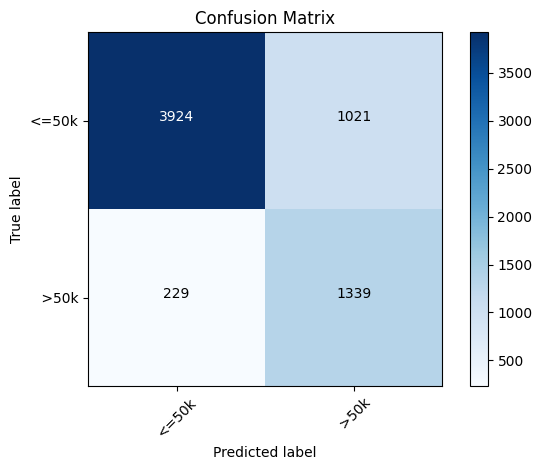


Training started for Random Forest


{'estimator__n_estimators': 100,
 'estimator__min_samples_split': 5,
 'estimator__min_samples_leaf': 2,
 'estimator__max_depth': 10,
 'estimator__criterion': 'gini',
 'estimator__bootstrap': False}

{'0': {'precision': 0.9567610062893082,
  'recall': 0.7383215369059656,
  'f1-score': 0.8334664992580755,
  'support': 4945.0},
 '1': {'precision': 0.5202076381164257,
  'recall': 0.8947704081632653,
  'f1-score': 0.657913247362251,
  'support': 1568.0},
 'accuracy': 0.7759864885613389,
 'macro avg': {'precision': 0.738484322202867,
  'recall': 0.8165459725346154,
  'f1-score': 0.7456898733101632,
  'support': 6513.0},
 'weighted avg': {'precision': 0.8516611012846896,
  'recall': 0.7759864885613389,
  'f1-score': 0.7912021818970049,
  'support': 6513.0}}

AUC: 0.8165459725346155


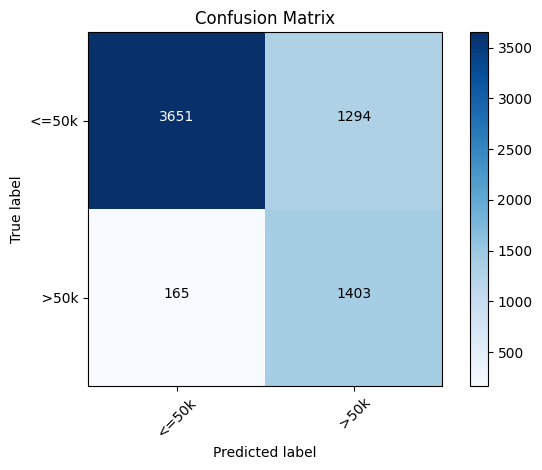


Training started for ADA-Boost


{'estimator__n_estimators': 220,
 'estimator__learning_rate': 1.0,
 'estimator__estimator__max_depth': 11}

{'0': {'precision': 0.8826471719892266,
  'recall': 0.9278058645096057,
  'f1-score': 0.9046633146012029,
  'support': 4945.0},
 '1': {'precision': 0.7285171102661597,
  'recall': 0.610969387755102,
  'f1-score': 0.6645855012140132,
  'support': 1568.0},
 'accuracy': 0.8515277138031629,
 'macro avg': {'precision': 0.8055821411276931,
  'recall': 0.7693876261323538,
  'f1-score': 0.784624407907608,
  'support': 6513.0},
 'weighted avg': {'precision': 0.8455404720380875,
  'recall': 0.8515277138031629,
  'f1-score': 0.8468647561195335,
  'support': 6513.0}}

AUC: 0.7693876261323539


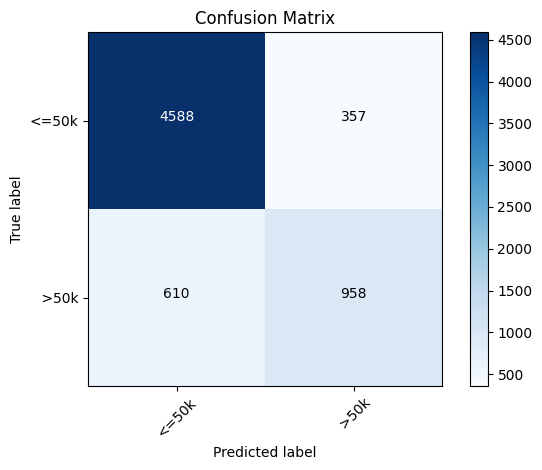


Training started for Naive Bayes


c:\Users\phili\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


{'estimator__alpha': 1.0}

{'0': {'precision': 0.9359218028780885,
  'recall': 0.6970677451971689,
  'f1-score': 0.7990264255910987,
  'support': 4945.0},
 '1': {'precision': 0.4706713780918728,
  'recall': 0.8494897959183674,
  'f1-score': 0.6057298772169168,
  'support': 1568.0},
 'accuracy': 0.7337632427452787,
 'macro avg': {'precision': 0.7032965904849806,
  'recall': 0.7732787705577682,
  'f1-score': 0.7023781514040077,
  'support': 6513.0},
 'weighted avg': {'precision': 0.823913102422878,
  'recall': 0.7337632427452787,
  'f1-score': 0.752490422543238,
  'support': 6513.0}}

AUC: 0.7732787705577681


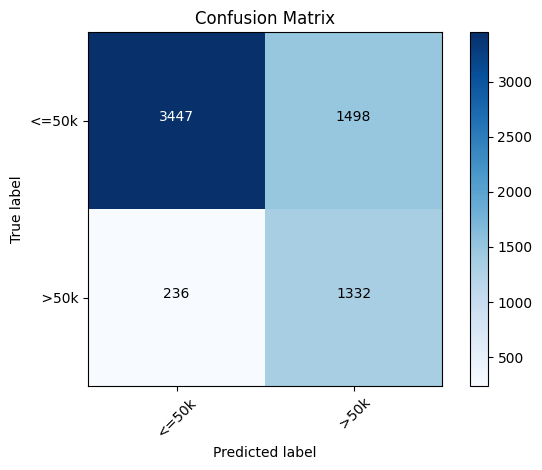

In [16]:
# evaluate all five best models

# create a list to save predictions
estimator_predictions = []


for randomized_search_estimator, name in zip(estimator_list, names):
    print(f'\nTraining started for {name}')
    randomized_search_estimator.fit(data_train, target_train)
    predictions = randomized_search_estimator.predict(data_test)
    estimator_predictions.append(predictions)
    display(randomized_search_estimator.best_params_)
    evaluate_classification(target_test, predictions)



After a thorough analysis of various models (KNN, Decision Tree, Random Forest, ADA-Boost, Naive Bayes), the goal is to identify the most suitable model for our scenario, where the objective is to enhance marketing effectiveness by targeting customers with an income above $50k.

Recall metrics provide valuable insights into an algorithm's ability to identify all relevant instances of a particular class. In our context, this refers to how effectively the model can pinpoint affluent customers (> $50,000 income).
Random Forest stands out with an impressive recall of 0.895, showcasing exceptional effectiveness in recognizing affluent customers. This high recall value implies that Random Forest excels in identifying actual positive instances compared to other models. Additionally, the AUC value indicates that Random Forest achieves a good balance between precision and recall.
Naive Bayes also demonstrates impressive performance with a recall of 0.849, making it a noteworthy contender for identifying high-income customers.

Therefore, Random Forest and Naive Bayes emerge as the top contenders for our specific scenario, prioritizing the identification of affluent customers. The final choice may depend on other considerations, but these models offer the highest recall values.

## 5.2. Precision-Recall Curves 

Classifier: KNN


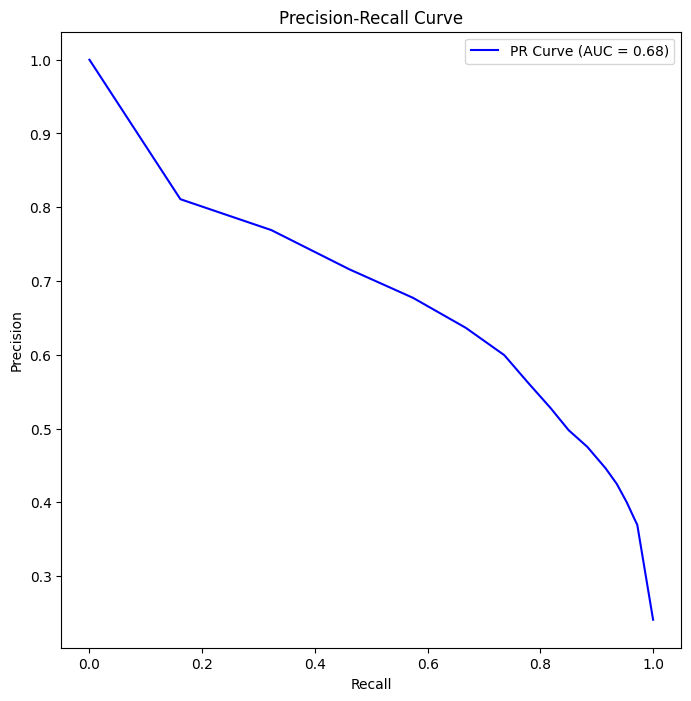

Classifier: DecisionTree


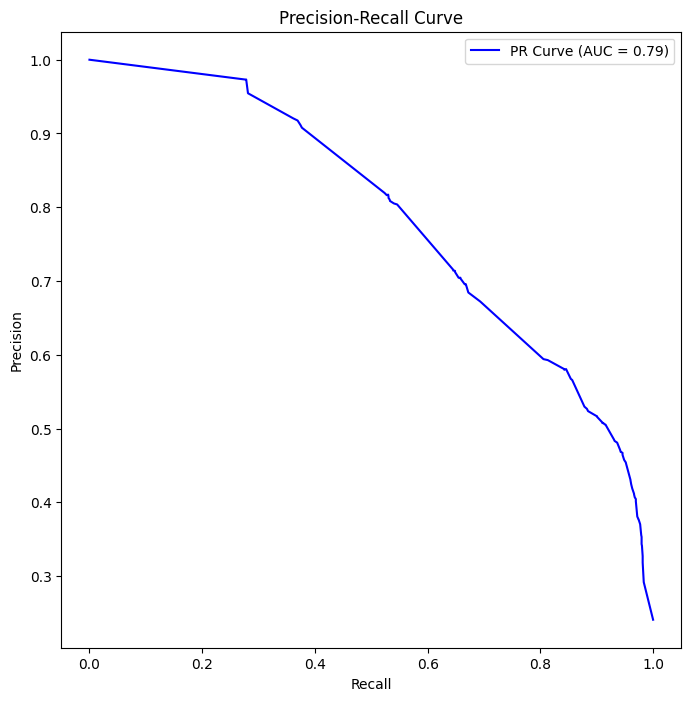

Classifier: Random Forest


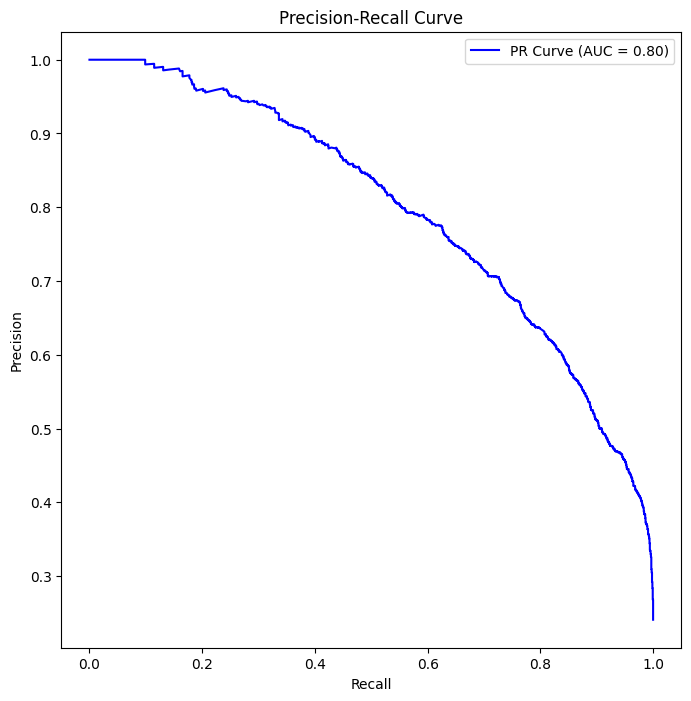

Classifier: ADA-Boost


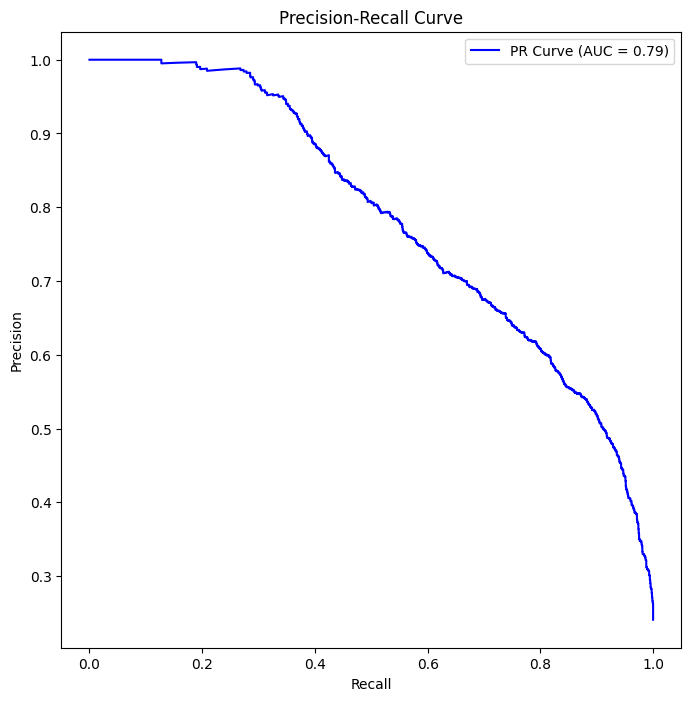

Classifier: Naive Bayes


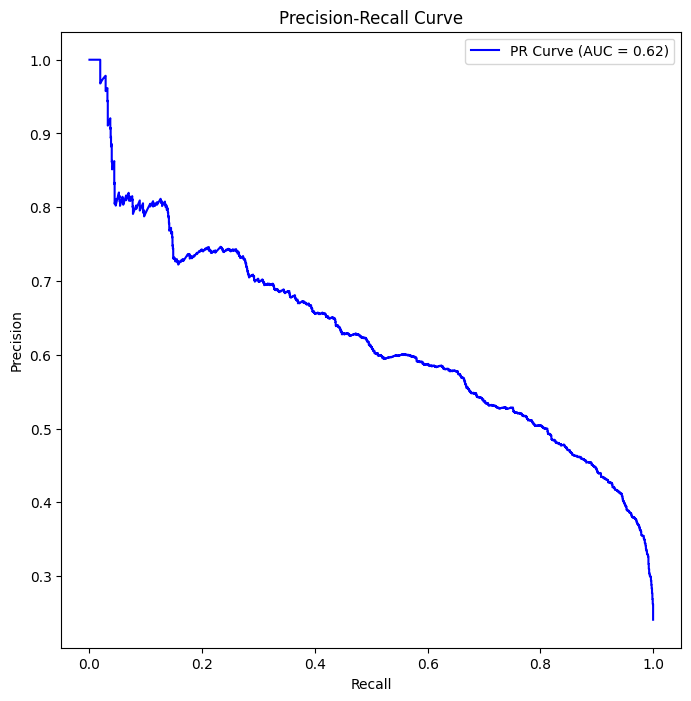

In [18]:
for randomized_search_estimator, name in zip(estimator_list, names):
    print(f'Classifier: {name}')
    evaluation_precision_recall(target_test, randomized_search_estimator.predict_proba(data_test)[:, 1])


In our specific case, where we aim to enhance marketing effectiveness and focus on customers with an income over $50,000, it makes sense to use the Precision-Recall curve. This curve provides insights into the trade-offs between precision and recall for various classification thresholds.

Since we are targeting a specific class (customers with an income over $50,000), precision is crucial to ensure that the identified positive instances genuinely belong to the target group. At the same time, recall is essential to capture as many truly positive instances as possible.

The Precision-Recall curve visualizes this trade-off, allowing us to choose the threshold that results in a balanced relationship between precision and recall. In our scenario, we likely want to select a threshold that maintains a high recall rate to capture as many potential high-income customers as possible while keeping precision at an acceptable level. Therefore, the Precision-Recall curve is a suitable tool to assess and optimize the models' performance in our specific application.

After plotting a Precision-Recall Curve for each classifier implemented, we can evaluate them both visually and quantitatively using their respective AUC (Area Under Curve) scores. The Random Forest Classifier, with an AUC score of 0.80, emerged as the most precise in terms of the trade-off between precision and recall. In contrast, the Decision Tree and Ada Boost classifiers, despite showing comparable AUC scores of 0.79, were less impressive in terms of other performance metrics.

The curve for Random Forest illustrates a stable decline in precision concurrent with an increase in recall, aiding in the setting of an optimal threshold to balance the trade-off. However, other Precision-Recall Curves, such as those of the Naive Bayes Classifier and the aforementioned Decision Tree and Ada Boost, depict a more non-linear descent, suggesting these classifiers struggle with consistent performance as the decision threshold changes. Such variability in their precision and recall measures further underscores the superior performance of the Random Forest Classifier in our specific application.

## 5.3. ROC Curves

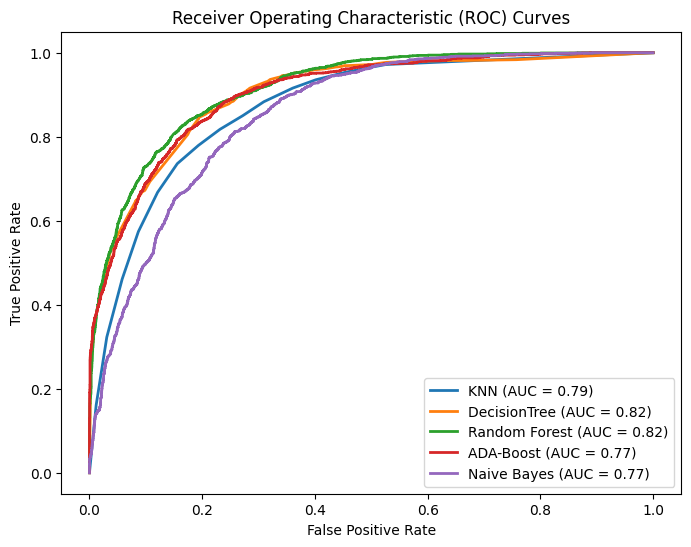

In [19]:
# we also want to compare them using the ROC-curves

# Define a function to plot the ROC curves
def plot_roc_curves(y_true, estimator_predictions, fitted_estimators, classifier_names):
    """
    Plot ROC curves for multiple classifiers on the same graph.

    Parameters:
    - y_true: array-like, true labels
    - estimators: list of fitted classifiers
    - classifier_names: list of strings, names of the classifiers

    Returns:
    - none, only plots the ROC curves
    """
    plt.figure(figsize=(8, 6))

    for estimator, classifier_name, predictions in zip(fitted_estimators, classifier_names,estimator_predictions):
        # Use predict_proba to get the predicted probabilities
        y_pred_proba = estimator.predict_proba(data_test)
        fpr, tpr, _ = roc_curve(y_true, y_pred_proba[:, 1])  # Use probabilities for the positive class
        roc_auc = roc_auc_score(y_true, predictions)
        plt.plot(fpr, tpr, lw=2, label=f'{classifier_name} (AUC = {roc_auc:.2f})')

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curves')
    plt.legend(loc='lower right')
    plt.show()

# Plot the ROC curves
plot_roc_curves(target_test, estimator_predictions, estimator_list, names)

The ROC curve illustrates the trade-off between True Positive Rate (TPR) and False Positive Rate (FPR), making it especially relevant when both rates are crucial. In our context, we aim to efficiently identify true positive instances (customers with an income over $50,000) while minimizing false positive identifications.

The highest AUC value (0.82) indicates that both Decision Tree and Random Forest achieve a better balance between TPR and FPR. Random Forest retains its status as the most suitable choice for our marketing scenario, where accurately identifying high-income customers while minimizing false identifications is paramount. Notably, the ROC curve for Random Forest still exhibits the steepest ascent, highlighting its superior trade-off between sensitivity and specificity.

`metric_params`